In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import os

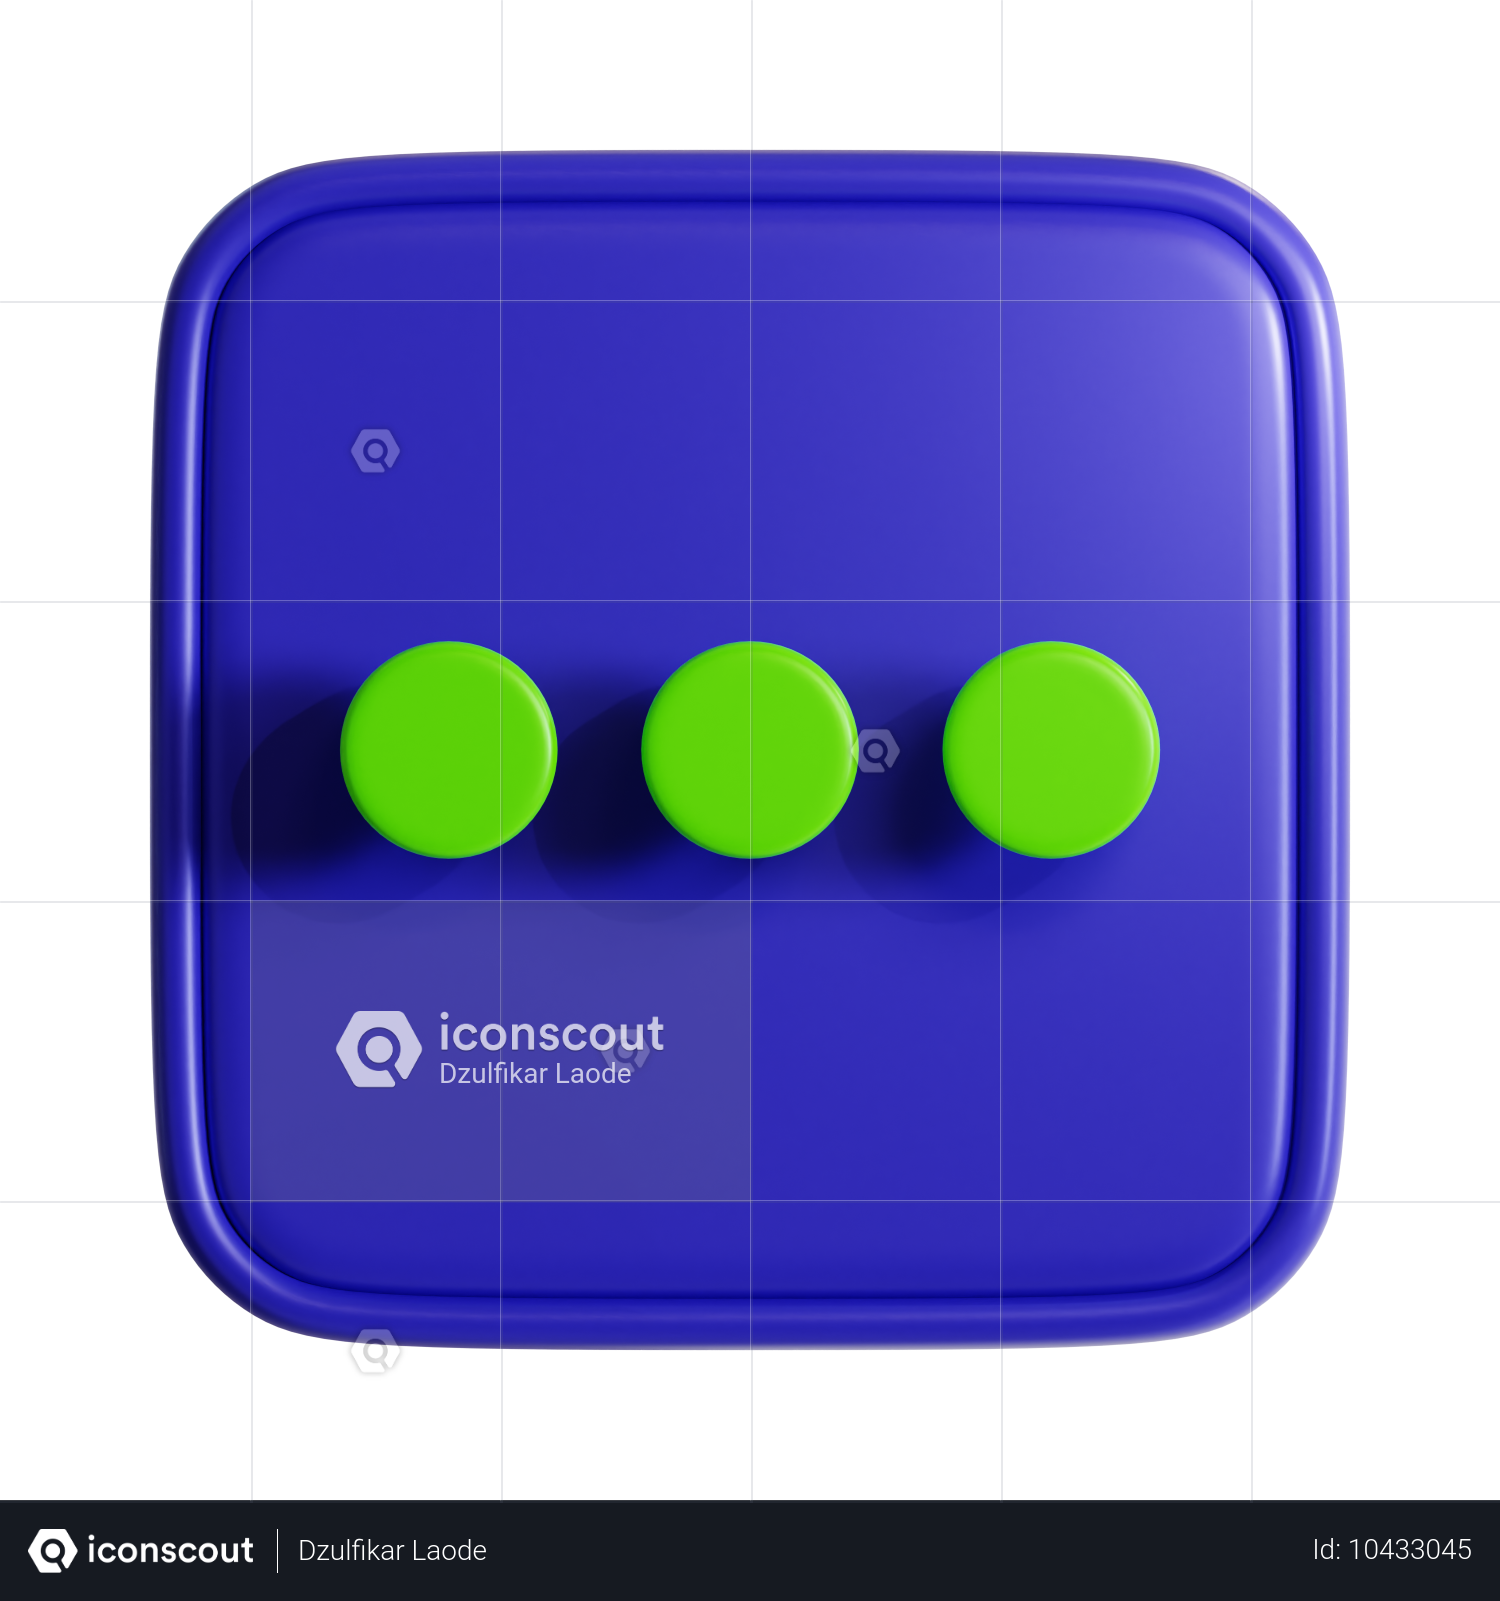

In [59]:
# Load image
file_path = 'image.png'
image = Image.open(file_path)
image

In [60]:
# Get file size in MB
file_size_bytes = os.path.getsize(file_path)
file_size_kb = file_size_bytes / 1024
print(f"Image size: {file_size_kb:.2f} KB")

Image size: 979.62 KB


In [61]:
image = np.array(image)

In [72]:
# Reshape image into (num_pixels, 3)
# 3 columns are because each pixel in a color image is represented by 3 values:
# R = Red intensity (0–255)
# G = Green intensity (0–255)
# B = Blue intensity (0–255)

pixels = image.reshape(-1, 3)

In [97]:
K = 1024  # smaller K → more compression
kmeans = KMeans(n_clusters=K, random_state=0)
labels = kmeans.fit_predict(pixels)

In [98]:
compressed_pixels = kmeans.cluster_centers_[labels]
compressed_image = compressed_pixels.reshape(image.shape).astype(np.uint8)

(np.float64(-0.5), np.float64(1499.5), np.float64(1600.5), np.float64(-0.5))

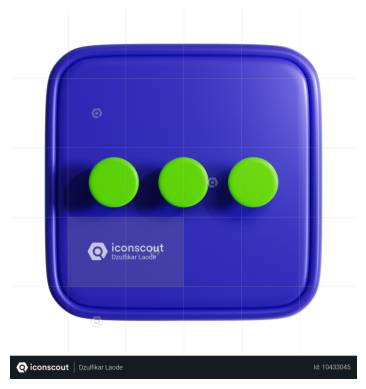

In [99]:
plt.imshow(image)
plt.axis('off')

(np.float64(-0.5), np.float64(1499.5), np.float64(1600.5), np.float64(-0.5))

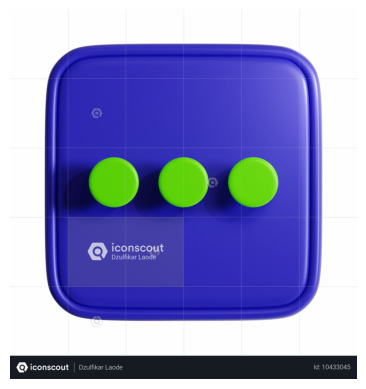

In [100]:
plt.imshow(compressed_image)
plt.axis('off')

In [101]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 22,  26,  33],
        [ 22,  26,  33],
        [ 22,  26,  33],
        ...,
        [ 22,  26,  33],
        [ 22,  26,  33],
        [ 22,  26,  33]],

       [[ 22,  26,  33],
        [ 22,  26,  33],
        [ 22,  26,  33],
        ...,
        [ 22,  26,  33],
        [ 22,  26,  33],
        [ 22,  26,  33]],

       [[ 22,  26,  33],
        [ 22,  26,  33],
        [ 22,  26,  33],
        ...,
        [ 22,  26,  33],
        [ 22,  26,  33],
        [ 22,  26,  33]]

In [102]:
file_size_bytes = image.nbytes
file_size_kb = file_size_bytes / 1024
print(f"Original Image size: {file_size_kb:.2f} KB")

Original Image size: 7035.64 KB


In [103]:
file_size_bytes = compressed_image.nbytes
file_size_kb = file_size_bytes / 1024
print(f"Compressed Image size: {file_size_kb:.2f} KB")

Compressed Image size: 7035.64 KB


In [104]:
Image.fromarray(image).save("original.jpg")
Image.fromarray(compressed_image).save("compressed.jpg")

In [105]:
# Check sizes in KB
orig_size_kb = os.path.getsize("original.jpg") / 1024
comp_size_kb = os.path.getsize("compressed.jpg") / 1024

print(f"Original file size: {orig_size_kb:.2f} KB")
print(f"Compressed file size: {comp_size_kb:.2f} KB")

Original file size: 110.74 KB
Compressed file size: 111.49 KB
